In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from matplotlib.path import Path

In [2]:
# Read File
df = pd.read_excel('Data/Turbines_At_Whitelee_Wind_Farm.xlsx')

# Print the Contents of the Excel File to Check the Data
print(df.head())

   Number   Latitude  Longitude    Altitude
0       1  55.689156  -4.358035  252.099340
1       2  55.686629  -4.351856  252.848013
2       3  55.695239  -4.363345  246.184076
3       4  55.693418  -4.355582  253.050163
4       5  55.685945  -4.341407  253.846623


In [3]:
# Extract latitude and longitude
latitudes = df['Latitude']
longitudes = df['Longitude']

# Define the Grid Size
grid_rows = 58
grid_cols = 73

# Calculate the Range of Latitude and Longitude
lat_min, lat_max = latitudes.min(), latitudes.max()
lon_min, lon_max = longitudes.min(), longitudes.max()

# Create an Empty Grid
grid = np.zeros((grid_rows, grid_cols), dtype=int)

# Populate the Grid
for lat, lon in zip(latitudes, longitudes):
    # Calculate the row and column indices for each turbine
    row_idx = int((lat - lat_min) / (lat_max - lat_min) * (grid_rows - 1))
    col_idx = int((lon - lon_min) / (lon_max - lon_min) * (grid_cols - 1))
    
    # Reverse row index to correct y-axis inversion
    row_idx = grid_rows - 1 - row_idx
    
    # Ensure indices are within bounds
    row_idx = min(max(row_idx, 0), grid_rows - 1)
    col_idx = min(max(col_idx, 0), grid_cols - 1)
    
    grid[row_idx, col_idx] = 1

# Convert the grid to a DataFrame for better visualisation (optional)
grid_df = pd.DataFrame(grid)


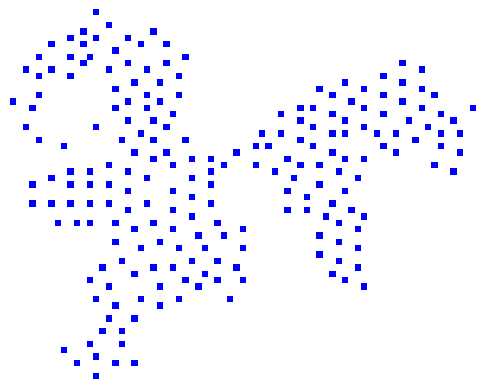

In [4]:
# Create a colour map
color_map = np.zeros((*grid_df.shape, 3)) 

# Set colour
color_map[grid_df == 1] = [0, 0, 1]  # Blue
color_map[grid_df == 2] = [1, 0, 0]  # Red
color_map[grid_df == 0] = [1, 1, 1]  # White

#Draw the matrix
plt.imshow(color_map, interpolation='nearest')
plt.axis('off')  # Close Axis
plt.show()

In [5]:
lake_df = pd.read_csv('Data/Lake_Boundary.csv')

# Print the contents of the Excel file to check the data
print(lake_df.head())

   Lake1_Point  Lake1_Latitude  Lake1_Longitude  Lake1_Altitude  Lake2_Point  \
0          1.0       55.705384        -4.326942      264.847931          1.0   
1          2.0       55.704446        -4.330011      263.962545          2.0   
2          3.0       55.704031        -4.330942      264.317414          3.0   
3          4.0       55.703462        -4.331779      263.918289          4.0   
4          5.0       55.702923        -4.332861      263.832656          5.0   

   Lake2_Latitude  Lake2_Longitude  Lake2_Altitude  Lake3_Point  \
0       55.714657        -4.307161      248.679583            1   
1       55.714233        -4.307401      248.599656            2   
2       55.714272        -4.307726      248.599717            3   
3       55.713914        -4.308118      248.693421            4   
4       55.713545        -4.308617      248.947010            5   

   Lake3_Latitude  Lake3_Longitude  Lake3_Altitude  \
0       55.679592        -4.350613      246.506081   
1       

In [6]:
# Coordinates of the vertices of the lake polygon (latitude and longitude)
lake1_coords = list(zip(lake_df['Lake1_Latitude'].dropna(), lake_df['Lake1_Longitude'].dropna()))
lake2_coords = list(zip(lake_df['Lake2_Latitude'].dropna(), lake_df['Lake2_Longitude'].dropna()))
lake3_coords = list(zip(lake_df['Lake3_Latitude'].dropna(), lake_df['Lake3_Longitude'].dropna()))

# View the number of vertices in each lake coordinate list
print("Vertices Number of Lake 1:", len(lake1_coords))
print("Vertices Number of Lake 2:", len(lake2_coords))
print("Vertices Number of Lake 3:", len(lake3_coords))

# Create polygonal paths
lake_path1 = Path(lake1_coords)
lake_path2 = Path(lake2_coords)
lake_path3 = Path(lake3_coords)

Vertices Number of Lake 1: 64
Vertices Number of Lake 2: 33
Vertices Number of Lake 3: 72


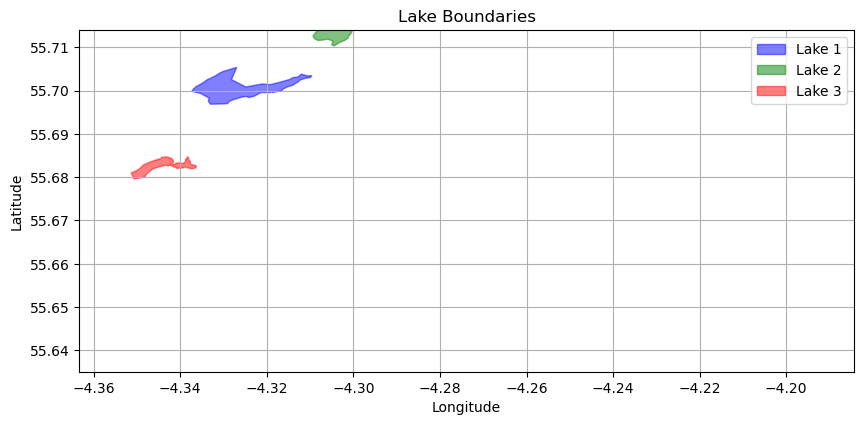

In [7]:
# Visualisation
plt.figure(figsize=(10, 6))

# Draw lake polygons
if len(lake1_coords) > 0:
    lake1 = np.array(lake1_coords)
    plt.fill(lake1[:, 1], lake1[:, 0], color='blue', alpha=0.5, label='Lake 1')
    
if len(lake2_coords) > 0:
    lake2 = np.array(lake2_coords)
    plt.fill(lake2[:, 1], lake2[:, 0], color='green', alpha=0.5, label='Lake 2')
    
if len(lake3_coords) > 0:
    lake3 = np.array(lake3_coords)
    plt.fill(lake3[:, 1], lake3[:, 0], color='red', alpha=0.5, label='Lake 3')

# Set up axis labels and legends
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lake Boundaries')
plt.legend()
plt.grid()
plt.xlim(lon_min, lon_max) 
plt.ylim(lat_min, lat_max) 
plt.gca().set_aspect('equal', adjustable='box') 
plt.show()

In [8]:
lat_step = (lat_max - lat_min) / (grid_rows - 1)
lon_step = (lon_max - lon_min) / (grid_cols - 1)

print(lat_min,lat_max)
print(lon_min,lon_max)
print(lat_step,lon_step)

55.6350646 55.7140006
-4.3633451 -4.1843088
0.0013848421052631366 0.0024866152777777767


In [9]:
if(lake_path2.contains_point((55.7140006, -4.3071606))):
    print(1)

1


In [10]:
if(lake_path2.contains_point((55.6350646, -4.3071606))):
    print(1)

In [11]:
for i in range(grid_rows):
    for j in range(grid_cols):
        lat = lat_max - i * lat_step
        lon = lon_min + j * lon_step
        
        # Check if the current point is inside any of the lake polygons
        if (lake_path1.contains_point((lat, lon)) or
            lake_path2.contains_point((lat, lon)) or
            lake_path3.contains_point((lat, lon))):
            grid_df[j][i] = 2  

In [12]:
grid_df.to_csv("Grid_Turbines_Unavailable_Cells.csv", index=False, header=False)

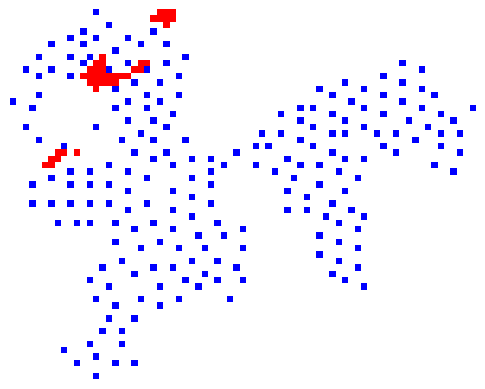

In [13]:
# Create a colour map
color_map = np.zeros((*grid_df.shape, 3)) 

# Set colour
color_map[grid_df == 1] = [0, 0, 1]  # Blue
color_map[grid_df == 2] = [1, 0, 0]  # Red
color_map[grid_df == 0] = [1, 1, 1]  # White

#Draw the matrix
plt.imshow(color_map, interpolation='nearest')
plt.axis('off')  # Close Axis
plt.show()